# Homework - Week 2#
Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator, and evaluate basic winning strategies.

* **Exercise 1**

For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 

Make a function **create_board()** that creates such a board, with values of integers 0.

Call create_board(), and store this as board.

In [73]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
board = create_board()
print(board)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


* **Exercise 2**

Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places there. 

Create a function **place(board, player, position)** with player being the current player (an integer 1 or 2) and position a tuple of length 2 specifying a desired location to place their marker. Only allow the current player to place a piece on the board (change the board position to their number) if that position is empty (zero).

Use create_board() to store a board as board, and use place to have Player 1 place a piece on spot (0, 0).

In [74]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
board = create_board()
place(board, 1, (0,0))

print(board)

[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


* **Example 3**

Create a function **possibilities(board)** that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: numpy.where is a handy function that returns a list of indexes that meet a condition.)

Call possibilities(board) to see what it returns!

In [75]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)
    
board = create_board()
place(board, 1, (0,0))
print(possibilities(board))

(array([0, 0, 1, 1, 1, 2, 2, 2], dtype=int64), array([1, 2, 0, 1, 2, 0, 1, 2], dtype=int64))


* **Exercise 4**

Create a function **random_place(board, player)** that places a marker for the current player at random among all the available positions (those currently set to 0).

Call random_place(board, player) to place a random marker for Player 2, and store this as board to update its value.

In [76]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
board = create_board()
place(board, 1, (0,0))
board = random_place(board, 2)
print(board)

[[ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 0.  0.  0.]]


* **Exercise 5**

Use random_place(board, player) to place 3 pieces on board each for players 1 and 2.

Print board to see your result.

In [77]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
board = create_board()
for i in range(3):
    board = random_place(board, 1)
    board = random_place(board, 2)
print(board)

[[ 0.  1.  1.]
 [ 0.  0.  1.]
 [ 2.  2.  2.]]


* **Exercise 6**

Now that players may place their pieces, how will they know they've won? 

Make a function **row_win(board, player)** that takes the player (integer), and determines if any row consists of only their marker. Have it return True of this condition is met, and False otherwise.

Call row_win to check if Player 1 has a complete row.

In [78]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

board = create_board()
board[1,:] = 1
    
print(board)
row_win(board, 1)

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 0.  0.  0.]]


True

* **Exercise 7**

Create a similar function **col_win(board, player)** that takes the player (integer), and determines if any column consists of only their marker. Have it return True if this condition is met, and False otherwise.

Call col_win to check if Player 1 has a complete column.

In [79]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

board = create_board()
board[:,2] = 1
    
print(board)
col_win(board, 1)

[[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


True

* **Exercise 8**

Finally, create a function **diag_win(board, player)** that tests if either diagonal of the board consists of only their marker. Have it return True if this condition is met, and False otherwise.

Call diag_win to check if Player 1 has a complete diagonal.

In [80]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
       
board = np.diag([1,1,1])
print(board)
diag_win(board, 1)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


True

* **Exercise 9**

Create a function **evaluate(board)** that uses ***row_win, col_win & diag_win*** functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.

Call evaluate to see if either player has won the game yet.

In [101]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
    
def evaluate(board):    
    for player in [1,2]:
        if row_win(board, player):
            return player
        if col_win(board, player):
            return player
        if diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    else:
        return 0
    
board = create_board()
for i in range(3):
    board = random_place(board, 1)
    board = random_place(board, 2)
    
print(board)
evaluate(board)

[[ 2.  0.  1.]
 [ 0.  2.  1.]
 [ 1.  0.  2.]]


2

* **Exercise 10**

***create_board(), random_place(board, player) & evaluate(board)*** have been created from previous exercises. 

Create a function **play_game()** that creates a board, calls alternates between two players (beginning with Player 1), and evaluates the board for a winner after every placement. Play the game until one player wins (returning 1 or 2 to reflect the winning player) or the game is a draw (returning -1).

Call play_game once.

In [85]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
    
def evaluate(board):    
    for player in [1,2]:
        if row_win(board, player):
            return player
        if col_win(board, player):
            return player
        if diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    else:
        return 0
    
def play_game():
    board = create_board()
    
    while True:
        for player in [1,2]:
            board = random_place(board, player)
            result = evaluate(board)
            if result in [-1, 1, 2]:
                print(board)
                return result
play_game()

[[ 1.  1.  2.]
 [ 2.  2.  1.]
 [ 1.  2.  1.]]


-1

* **Exercise 11**

Use the play_game() function to play 1,000 random games, where Player 1 always goes first.

When doing this, import and use the time library to call the time function both before and after playing all 1,000 games in order to evaluate how long this takes per game. Print your answer.

Use plt.hist and plt.show to plot a histogram of the results. Does Player 1 win more than Player 2? Does either player win more than each player draws?

Time to play 1000 games 0.6947412490844727


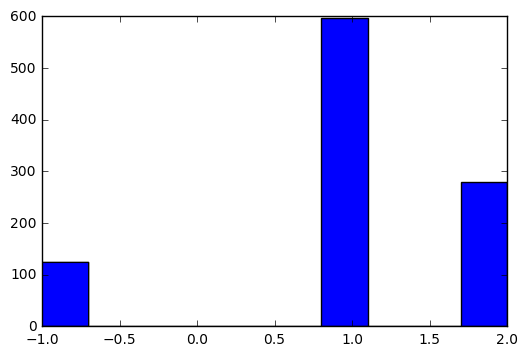

In [107]:
import time
import numpy as np
import matplotlib.pyplot as plt

def create_board():
    return np.zeros((3,3))

def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
    
def evaluate(board):    
    for player in [1,2]:
        if row_win(board, player):
            return player
        if col_win(board, player):
            return player
        if diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    else:
        return 0
    
def play_game():
    board = create_board()
    
    while True:
        for player in [1,2]:
            board = random_place(board, player)
            result = evaluate(board)
            if result in [-1, 1, 2]:
                return result
            
winner = []

start_time = time.time()
for i in range(1000):
    winner.append(play_game())    
end_time = time.time()
print("Time to play 1000 games", end_time - start_time)
plt.hist(winner)
plt.show()

* **Exercise 12**

This result is expected --- when guessing at random, it's better to go first. 

Let's see if Player 1 can improve their strategy. Create a function play_strategic_game(), where Player 1 always starts with the middle square and otherwise both players place their markers randomly.

Call play_strategic_game once.

In [105]:
import time
import numpy as np
import matplotlib.pyplot as plt

def create_board():
    return np.zeros((3,3))

def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
    
def evaluate(board):    
    for player in [1,2]:
        if row_win(board, player):
            return player
        if col_win(board, player):
            return player
        if diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    else:
        return 0

def play_strategic_game():
    board = create_board()
    # Init the first step
    board[1][1] = 1
    random_place(board, 2)
    
    while True:
        for player in [1,2]:
            board = random_place(board, player)
            result = evaluate(board)
            if result in [-1, 1, 2]:
                return result
            
play_strategic_game()

2

* ** Exercise 13**

Use the play_strategic_game() function to play 1,000 random games.

Use the time libary to evaluate how long all these games takes.

Use plt.hist and plt.show to plot your results. Did Player 1's performance improve? Does either player win more than each player draws?

Time to play 1000 games 0.4947335720062256


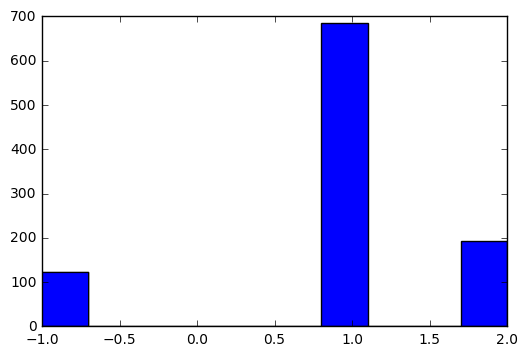

In [110]:
import time
import numpy as np
import matplotlib.pyplot as plt

def create_board():
    return np.zeros((3,3))

def place(board, player, position):
    if board[position[0]][position[1]] == 0:
        board[position[0]][position[1]] = player
        
def possibilities(board):
    return np.where(board==0)

def random_place(board, player):
    pos = possibilities(board)
    idx = np.random.choice(range(len(pos[0])))
    board[pos[0][idx]][pos[1][idx]] = player
    return board
    
def row_win(board, player):
    row, col = board.shape
    for i in range(row):
        if( np.all(board[i,:] == player) ):
            return True
    return False

def col_win(board, player):
    row, col = board.shape
    for i in range(col):
        if( np.all(board[:,i] == player) ):
            return True
    return False

def diag_win(board, player):
    if np.all(board.diagonal() == player):
        return True
    if np.all(np.fliplr(board).diagonal() == player):
        return True
    return False
    
def evaluate(board):    
    for player in [1,2]:
        if row_win(board, player):
            return player
        if col_win(board, player):
            return player
        if diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    else:
        return 0

def play_strategic_game():
    board = create_board()
    # Init the first step
    board[1][1] = 1
    random_place(board, 2)
    
    while True:
        for player in [1,2]:
            board = random_place(board, player)
            result = evaluate(board)
            if result in [-1, 1, 2]:
                return result

def play_game():
    board = create_board()
    
    while True:
        for player in [1,2]:
            board = random_place(board, player)
            result = evaluate(board)
            if result in [-1, 1, 2]:
                return result
                      
winner = []
start_time = time.time()
for i in range(1000):
    winner.append(play_strategic_game())    
end_time = time.time()
print("Time to play 1000 games", end_time - start_time)
plt.hist(winner)
plt.show()